#### Importando as LIBS

In [300]:

import numpy as np
import pandas as pd

import yfinance as yf
import openpyxl 
import datetime as dt

import seaborn as sns
import plotly.graph_objects as Dash
import plotly.express as px
import matplotlib.pyplot as plt
import streamlit as st


#### Importando os dados Ibovepa

In [301]:

ibovespa = yf.download(tickers='^BVSP', period='1y')['Adj Close']

[*********************100%***********************]  1 of 1 completed


#### Verificando DataFrame

In [302]:

ibovespa.head(15)

Ticker,^BVSP
Date,
2024-02-07,129608.0
2024-02-08,128217.0
2024-02-09,128026.0
2024-02-14,127018.0
2024-02-15,127804.0
2024-02-16,128726.0
2024-02-19,129036.0
2024-02-20,129916.0
2024-02-21,130032.0


#### Valores duplicados

In [303]:
ibovespa.duplicated().sum()

np.int64(7)

#### Info

In [304]:
ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-02-07 to 2025-02-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^BVSP   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


#### Estatisticas

In [305]:
ibovespa.describe()

Ticker,^BVSP
count,252.000000
mean,127507.416667
std,4209.867736
min,118533.000000
25%,124775.500000
50%,127660.000000
75%,129932.000000
max,137344.000000


#### Estilos do gráfico

In [306]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### média móvel

In [307]:
media_movel = ibovespa['^BVSP'].rolling(5).mean()

#### Gráfico

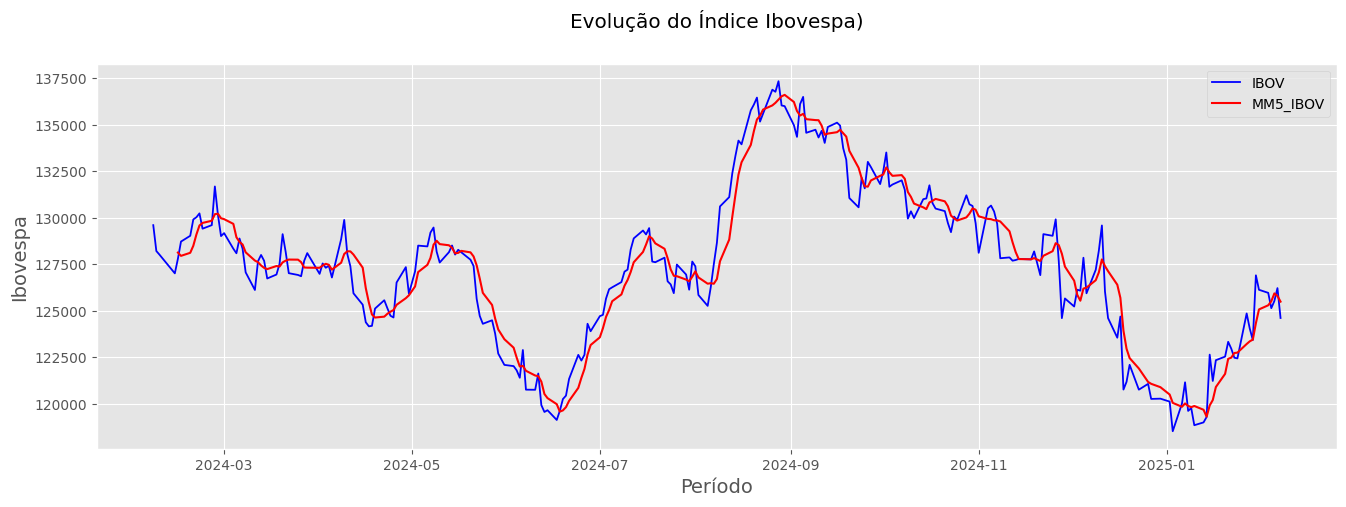

In [308]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Evolução do Índice Ibovespa)', pad=26)
plt.plot(ibovespa.index, ibovespa['^BVSP'], color='blue', linewidth=1.3, label='IBOV')
plt.plot(media_movel, color='red', label='MM5_IBOV')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Ibovespa', fontsize=14)
plt.legend();


#### Carteira de ativos 

In [309]:
tickers = ['PETR4.SA', 'WEGE3.SA', 'VALE']
carteira = yf.download(tickers=tickers, period='1y')['Adj Close']
carteira

[*********************100%***********************]  3 of 3 completed


Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-02-07,34.465271,NaN,33.039368
2024-02-08,34.187592,12.137586,33.206379
2024-02-09,33.730228,12.128440,32.783936
2024-02-12,NaN,12.283933,NaN
2024-02-13,NaN,12.036973,NaN
...,...,...,...
2025-02-03,37.500000,9.360000,53.900002
2025-02-04,37.130001,9.430000,54.060001
2025-02-05,36.860001,9.370000,54.470001


#### Informações da Carteira

In [310]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2024-02-07 to 2025-02-07
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  252 non-null    float64
 1   VALE      251 non-null    float64
 2   WEGE3.SA  252 non-null    float64
dtypes: float64(3)
memory usage: 8.1 KB


#### Verificando valores nulos da carteira

In [311]:
carteira.isnull().sum()

Ticker
PETR4.SA    8
VALE        9
WEGE3.SA    8
dtype: int64

#### Mapa de calor nulos

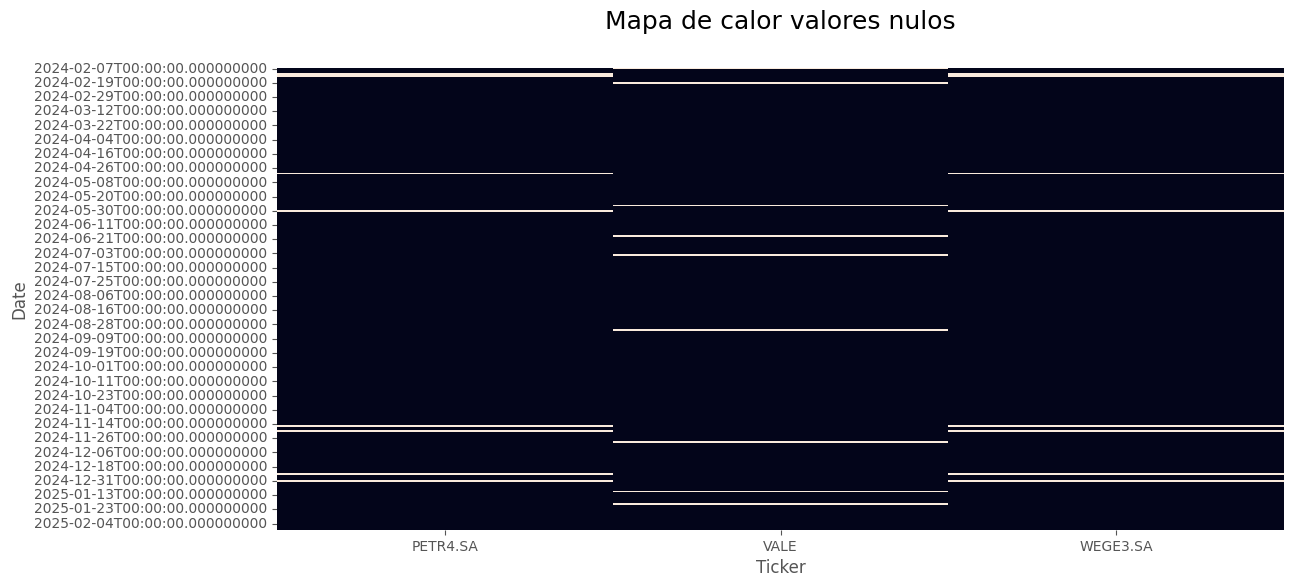

In [312]:
plt.figure(figsize=(13,6))
plt.title('Mapa de calor valores nulos', fontsize=18, pad=28)
sns.heatmap(carteira.isnull(), cbar=False);

#### Estatisticas da Carteira

In [313]:
carteira.describe()

Ticker,PETR4.SA,VALE,WEGE3.SA
count,252.000000,251.000000,252.000000
mean,34.190893,10.699349,46.948498
std,1.937788,1.047047,7.995076
min,29.115801,8.500000,32.626743
25%,33.033772,9.995743,38.463047
50%,34.238323,10.704415,49.950180
75%,35.636897,11.627131,54.094698
max,37.689999,12.466866,58.465912


#### Excluindo valores nulos da Carteira

In [314]:

carteira.dropna(inplace=True)

#### Informações da carteira após exclusao dos valores nulos 

In [315]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2024-02-08 to 2025-02-07
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PETR4.SA  243 non-null    float64
 1   VALE      243 non-null    float64
 2   WEGE3.SA  243 non-null    float64
dtypes: float64(3)
memory usage: 7.6 KB


#### Gráfico

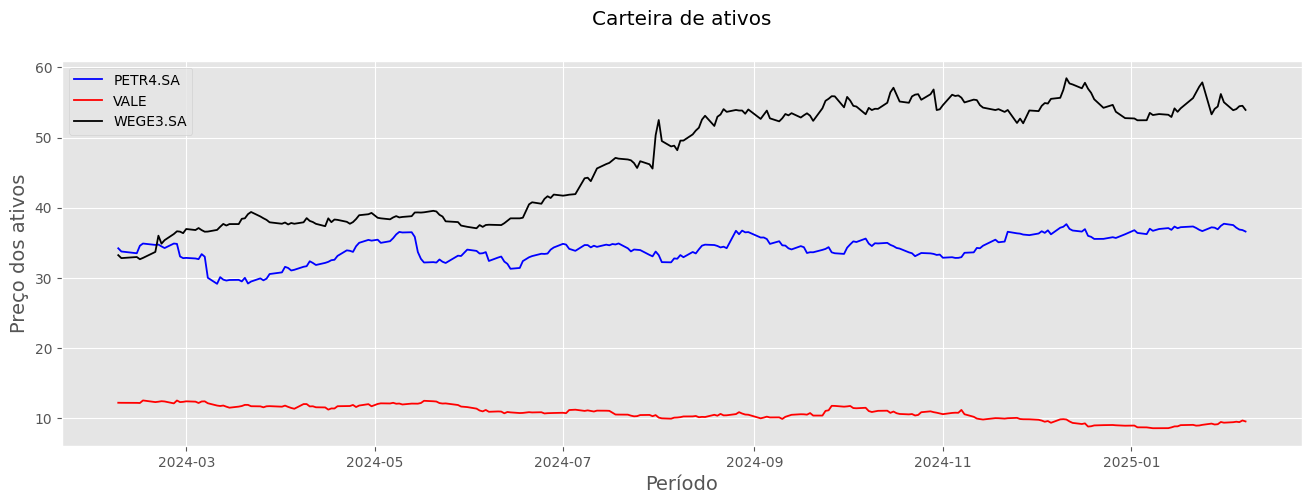

In [316]:
plt.figure(figsize=(16, 5))
plt.style.use('ggplot')
plt.title('Carteira de ativos', pad=26)
plt.plot(carteira.index, carteira['PETR4.SA'], color='blue', linewidth=1.3, label='PETR4.SA')
plt.plot(carteira['VALE'], color='red', linewidth=1.3, label='VALE')
plt.plot(carteira['WEGE3.SA'], color='black', linewidth=1.3, label='WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Preço dos ativos', fontsize=14)
plt.legend();


#### Normalizando os dados do ibovespa

In [317]:
ibovespa_normalizado = ibovespa / ibovespa.iloc[0]
ibovespa_normalizado.head()

Ticker,^BVSP
Date,
2024-02-07,1.000000
2024-02-08,0.989268
2024-02-09,0.987794
2024-02-14,0.980017
2024-02-15,0.986081


#### Carteira Normalizada

In [318]:
carteira_normalizada = carteira / carteira.iloc[0]
carteira_normalizada.head()

Ticker,PETR4.SA,VALE,WEGE3.SA
Date,,,
2024-02-08,1.000000,1.000000,1.000000
2024-02-09,0.986622,0.999246,0.987278
2024-02-14,0.979216,0.998493,0.992012
2024-02-15,1.010511,0.996986,0.982544
2024-02-16,1.019828,1.027129,0.988166


#### Gráfico : Ativos da Carteira e IBOVESPA

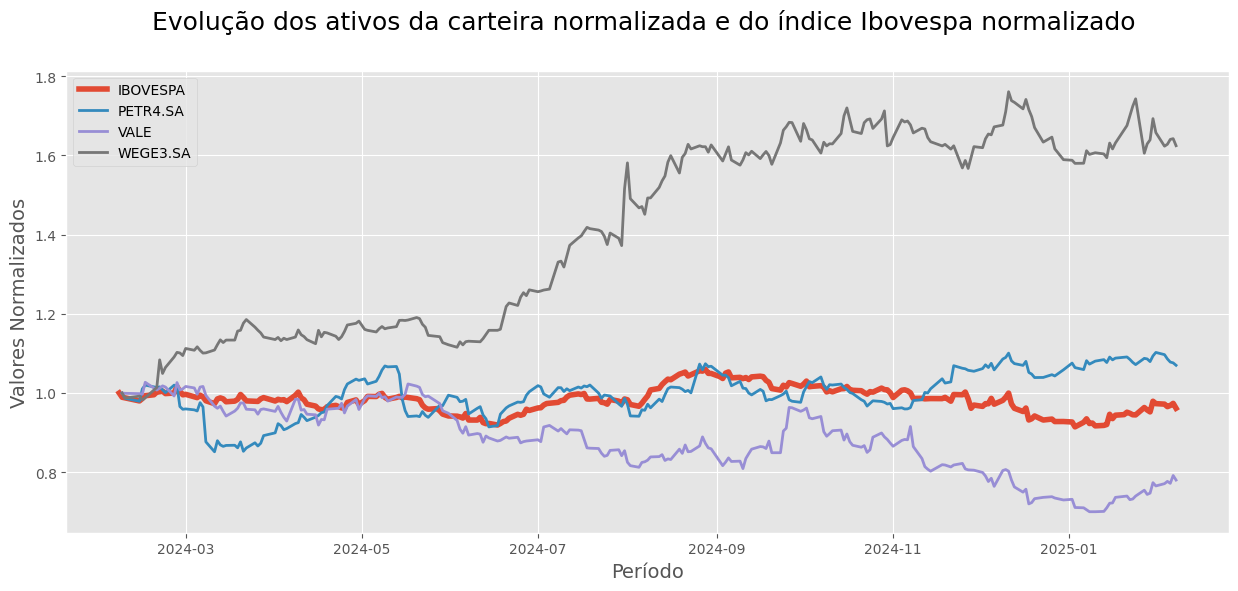

In [319]:
plt.figure(figsize=(15,6))
plt.title('Evolução dos ativos da carteira normalizada e do índice Ibovespa normalizado ', fontsize=18, pad=30)
plt.plot(ibovespa_normalizado.index, ibovespa_normalizado['^BVSP'], linewidth=4, label= 'IBOVESPA')
plt.plot(carteira_normalizada.index, carteira_normalizada['PETR4.SA'], linewidth=2, label= 'PETR4.SA')
plt.plot(carteira_normalizada.index, carteira_normalizada['VALE'], linewidth=2, label= 'VALE')
plt.plot(carteira_normalizada.index, carteira_normalizada['WEGE3.SA'], linewidth=2, label= 'WEGE3.SA')
plt.xlabel('Período', fontsize=14)
plt.ylabel('Valores Normalizados', fontsize=14)
plt.legend();

In [320]:
# Gráfico de linhas
fig = px.line(ibovespa_normalizado,
               y='^BVSP',
               title='Variação do Ibovespa ao longo do tempo',
               color_discrete_sequence=['#6959CD']
               );

# Plotar 
fig.show()

In [321]:
# Criar dashboard


# Criando uma figura
figura = Dash.Figure()


# Adicionando o primeiro eixo
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['PETR4.SA'],
        mode='lines',
        name='PETR4.SA',
        marker_color='#ff7f0e',
        opacity=0.5,
    )
)



# Adicionando VALE
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['VALE'],
        mode='lines',
        name='VALE',
        marker_color='#d62728',
        opacity=0.5,
    )
)



# Adicionando a WEG3
figura.add_trace(
    Dash.Scatter(
        x=carteira_normalizada.index,
        y=carteira_normalizada['WEGE3.SA'],
        mode='lines',
        name='WEGE3.SA',
        marker_color='#2ca02c'
    )
)

# Adicionando o IBOVESPA


figura.add_trace(
    Dash.Scatter(
        x=ibovespa_normalizado.index,
        y=ibovespa_normalizado['^BVSP'],
        mode='lines',
        name='IBOVESPA',
        marker_color='#4B0082'
    )
)



# Ajustes no layout
figura.update_layout(

    # título
    title='Evolução dos ativos da carteira normalizada e do índice Ibovespa normalizado ',
    # Tamanho
    titlefont_size=20,
    
    # Ajustando o eixo x
    xaxis=dict(
        title='Período Histórico',
        titlefont_size=14,
        tickfont_size=10
    ),


    # Ajustando o eixo y
    yaxis=dict(
        title='Valores Normalizados',
        titlefont_size=14,
        tickfont_size=10
    ),


    # Parâmetros para Legenda
    legend=dict(
        x=1,
        y=1
    )

)

## Importando dados do BACEN

###### Pesquisar do no google "BCB SGS"
###### Link: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
###### Pesquisar no google "api sgs bcb"
###### Link: https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88


### Função para extração de Dados do BACEN

In [322]:

def consulta_bcb(codigo_bcb):
    url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_bcb}/dados?formato=json"

    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace= True)
    return df

- ### Consulta: IPCA - em 12 meses

In [323]:
ipca_12M = consulta_bcb(13522)
ipca_12M
ipca_12M_2000 = ipca_12M[ipca_12M.index >= '2000-01-01']
ipca_12M_2000


,valor
data,
2000-01-01,8.85
2000-02-01,7.86
2000-03-01,6.92
2000-04-01,6.77
2000-05-01,6.47
...,...
2024-08-01,4.24
2024-09-01,4.42
2024-10-01,4.76


In [324]:
# Gráfico de linhas
fig = px.line(ipca_12M_2000,
               y='valor',
               title='Variação do IPCA em 12 meses ao longo do tempo',
               color_discrete_sequence=['#6959CD']
               );

# Plotar 
fig.show()

- ### Consulta: Taxa de juros - Meta Selic definida pelo Copom

In [325]:
selic_meta = consulta_bcb(432)
selic_meta_2000 = selic_meta[selic_meta.index >= '2000-01-01']
selic_meta_2000

,valor
data,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2025-03-15,13.25
2025-03-16,13.25
2025-03-17,13.25


In [326]:
fig = px.line(selic_meta_2000,
               y='valor',
               title='Taxa de juros - Meta Selic definida pelo Copom',
               color_discrete_sequence=['#53f8f9']
               );

# Plotar 
fig.show()





In [327]:
ipca_12M_2000

,valor
data,
2000-01-01,8.85
2000-02-01,7.86
2000-03-01,6.92
2000-04-01,6.77
2000-05-01,6.47
...,...
2024-08-01,4.24
2024-09-01,4.42
2024-10-01,4.76


In [328]:
selic_meta_2000

,valor
data,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2025-03-15,13.25
2025-03-16,13.25
2025-03-17,13.25


In [329]:
fig = Dash.Figure()

fig.add_trace(Dash.Scatter(
    x=selic_meta_2000.index,
    y=selic_meta_2000['valor'],
    mode='lines',
    name='Selic Meta', 
    line=dict(color='blue')  
))

fig.add_trace(Dash.Scatter(
    x=ipca_12M_2000.index,
    y=ipca_12M_2000['valor'],
    mode='lines',
    name='IPCA 12M', 
    line=dict(color='red')  
))

fig.update_layout(
    title='Evolução: Taxa SELIC META x IPCA-12M',
    xaxis_title='Data',
    yaxis_title='Valor',
    legend_title='Legenda'
)

fig.show()

### Taxa de Desocupação

In [330]:
Desemprego = consulta_bcb(24369)

In [331]:
Desemprego.tail()

,valor
data,
2024-08-01,6.6
2024-09-01,6.4
2024-10-01,6.2
2024-11-01,6.1
2024-12-01,6.2


In [332]:

fig = Dash.Figure()

fig.add_trace(Dash.Scatter(
    x=Desemprego.index,
    y=Desemprego['valor'],
    mode='lines',
    name='Taxa Desocupação', 
    line=dict(color='blue')  
))


fig.update_layout(
    title='Evolução Mensal da Taxa de desocupação (%) - Desemprego',
    xaxis_title='Data',
    yaxis_title='Valor',
    legend_title='Legenda'
)

fig.show()


In [333]:
Desemprego['Média móvel'] = Desemprego['valor'].rolling(window=5).mean()


In [334]:
fig = Dash.Figure()

fig.add_trace(Dash.Scatter(
    x=Desemprego.index,
    y=Desemprego['valor'],
    mode='lines',
    name='Taxa Desocupação', 
    line=dict(color='blue')  
))

fig.add_trace(Dash.Scatter(
    x=Desemprego.index,
    y=Desemprego['Média móvel'],
    mode='lines',
    name='MM5', 
    line=dict(color='red')  
))


fig.update_layout(
    title='Evolução Mensal da Taxa de desocupação (%) - Desemprego',
    xaxis_title='Período',
    yaxis_title='Valor',
    legend_title='Legenda'
)



#### Desemprego Máxima

In [335]:
Desemprego[Desemprego['valor'] == Desemprego['valor'].max()]

,valor,Média móvel
data,,
2020-09-01,14.9,14.10
2021-03-01,14.9,14.52


#### Desemprego mínima

In [336]:
Desemprego[Desemprego['valor'] == Desemprego['valor'].min()]


,valor,Média móvel
data,,
2024-11-01,6.1,6.42


#### Variação desemprego período: Dez 2013 - Mar 2017

In [337]:
Desemprego

,valor,Média móvel
data,,
2012-03-01,8.0,NaN
2012-04-01,7.8,NaN
2012-05-01,7.7,NaN
2012-06-01,7.6,NaN
2012-07-01,7.5,7.72
...,...,...
2024-08-01,6.6,6.98
2024-09-01,6.4,6.76
2024-10-01,6.2,6.58


In [338]:
data_inicial = '2013-12-01'
data_final = '2017-03-01'

In [339]:
valor_inicial = Desemprego.loc[data_inicial, 'valor']
valor_inicial

np.float64(6.3)

In [340]:
valor_final = Desemprego.loc[data_final, 'valor']
valor_final

np.float64(13.9)

In [341]:
variacao = ((valor_final-valor_inicial)/(valor_inicial))*100
variacao

np.float64(120.63492063492065)

#### Variação desemprego período: Mar 2021 - Nov 2024

In [342]:
data_inicial_ = '2021-03-01'
data_final_ = '2024-11-01'


In [343]:
valor_incial_ = Desemprego.loc[data_inicial_, 'valor']
valor_final_ = Desemprego.loc[data_final_, 'valor']

valor_incial_

np.float64(14.9)

In [344]:
valor_final_

np.float64(6.1)

In [345]:
variacao_ = ((valor_final_-valor_incial_)/(valor_incial_))*100
variacao_

np.float64(-59.06040268456376)

# Filtrando os valores da variação

In [346]:
linha_dados = Desemprego.loc[(Desemprego.index == data_inicial) | (Desemprego.index == data_final)
                             | (Desemprego.index == data_inicial_)
                             | (Desemprego.index == data_final_)]

linha_dados



,valor,Média móvel
data,,
2013-12-01,6.3,6.78
2017-03-01,13.9,12.82
2021-03-01,14.9,14.52
2024-11-01,6.1,6.42


In [347]:
print(valor_inicial, valor_final)
print(valor_incial_, valor_final_)

6.3 13.9
14.9 6.1
